# Fraud Detection in Credit Card Transactions

## Problem and Objective

Financial fraud poses significant risks to individuals and institutions, leading to monetary losses and compromised security. The project aims to compare multiple classification methods, feature selection techniques, and anomaly detection approaches to enhance fraud detection. The goal is to create a fraud detection system which outperforms current solutions.

## Versions

In [1]:
import sys
import numpy
import pandas # polars could be more efficient than pandas
import matplotlib
import seaborn

print(f"Python version: {sys.version}")
print(f"Numpy version: {numpy.__version__}")
print(f"Pandas version: {pandas.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {seaborn.__version__}")

Python version: 3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:12:04) [Clang 18.1.8 ]
Numpy version: 2.1.0
Pandas version: 2.2.2
Matplotlib version: 3.9.2
Seaborn version: 0.13.2


## Data Loading and Exploratory Data Analysis

> The dataset contains transactions made by credit cards in September 2013 by European cardholders.
>
> It contains only numerical input variables – `V1` to `V28`, the pricipal components – which are the result of a PCA transformation.
> The original features and more information are not disclosed for confidentiality reasons.
>
> `Time` and `Amount` have not been transformed.
> `Time` contains the seconds between the first transaction and an individual transaction.
> `Amount` is the transaction amount.
>
> `Class` is the response variable (`1` = fraudulent, `0` = non-fraudulent)

*– from [Kaggle Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)*

### Importing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# to split the large file into 2 smaller files
"""
df = pd.read_csv('creditcard.csv')

mid_index = len(df) // 2 # find midpoint

# split df into two
df.iloc[:mid_index].to_csv('creditcard_part1.csv', index=False)
df.iloc[mid_index:].to_csv('creditcard_part2.csv', index=False)

print("CSV file split and saved.")
"""

'\ndf = pd.read_csv(\'creditcard.csv\')\n\nmid_index = len(df) // 2 # find midpoint\n\n# split df into two\ndf.iloc[:mid_index].to_csv(\'creditcard_part1.csv\', index=False)\ndf.iloc[mid_index:].to_csv(\'creditcard_part2.csv\', index=False)\n\nprint("CSV file split and saved.")\n'

In [4]:
df1 = pd.read_csv('creditcard_part1.csv')
df2 = pd.read_csv('creditcard_part2.csv')

# merge dataframes
ccdata = pd.concat([df1, df2], ignore_index=True)

In [5]:
ccdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### General

In [6]:
ccdata.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no null values in the dataset.

`Time` is an interval decimal number. It is the difference between an individual transaction and the first transaction.

`V1` to `V28` are interval decimal numbers. They are the values obtained by the PCA for the features.

`Amount` is a ratio decimal number. It represents the transaction amount.

`Class` is a nominal integer. It represents whether or not a transaction was fraudulent.

In [8]:
ccdata.describe().transpose().apply(lambda x: x.apply('{:.5f}'.format))

,count,mean,std,min,25%,50%,75%,max
Time,284807.00000,94813.85958,47488.14595,0.00000,54201.50000,84692.00000,139320.50000,172792.00000
V1,284807.00000,0.00000,1.95870,-56.40751,-0.92037,0.01811,1.31564,2.45493
V2,284807.00000,0.00000,1.65131,-72.71573,-0.59855,0.06549,0.80372,22.05773
V3,284807.00000,-0.00000,1.51626,-48.32559,-0.89036,0.17985,1.02720,9.38256
V4,284807.00000,0.00000,1.41587,-5.68317,-0.84864,-0.01985,0.74334,16.87534
V5,284807.00000,0.00000,1.38025,-113.74331,-0.69160,-0.05434,0.61193,34.80167
V6,284807.00000,0.00000,1.33227,-26.16051,-0.76830,-0.27419,0.39856,73.30163
V7,284807.00000,-0.00000,1.23709,-43.55724,-0.55408,0.04010,0.57044,120.58949
V8,284807.00000,0.00000,1.19435,-73.21672,-0.20863,0.02236,0.32735,20.00721
V9,284807.00000,-0.00000,1.09863,-13.43407,-0.64310,-0.05143,0.59714,15.59499


`Time` is between 0 and 172,792. This is close to the expected two days of 172,800 seconds.

`V1` to `V28` all have zero mean.

`Amount` appears to have a strong positive skew (skewed right).

`Class` is either 0 or 1 (normal or fraudulent transaction)

### Class (Balance of Dataset)

In [9]:
ccdata['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

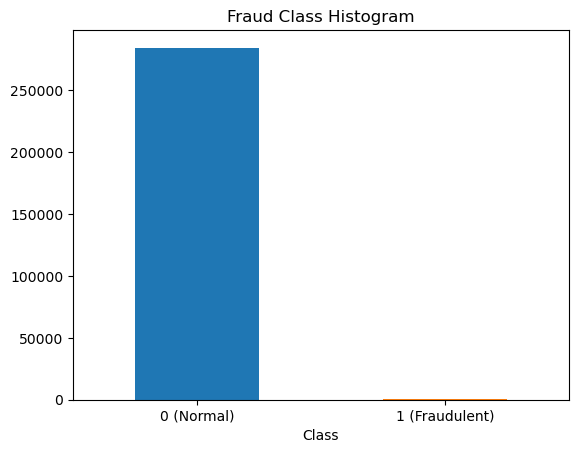

In [10]:
ax=ccdata['Class'].value_counts().plot(kind='bar', color=['tab:blue', 'tab:orange'])

plt.title('Fraud Class Histogram')
ax.set_xticklabels(['0 (Normal)', '1 (Fraudulent)'], rotation=0);

The 492 fraudulent transactions only represent 0.173% of all transactions (284,315).

The dataset is **highly unbalanced**.

### Transaction Amount

/Users/cedrickeller/anaconda3/envs/cs5831/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


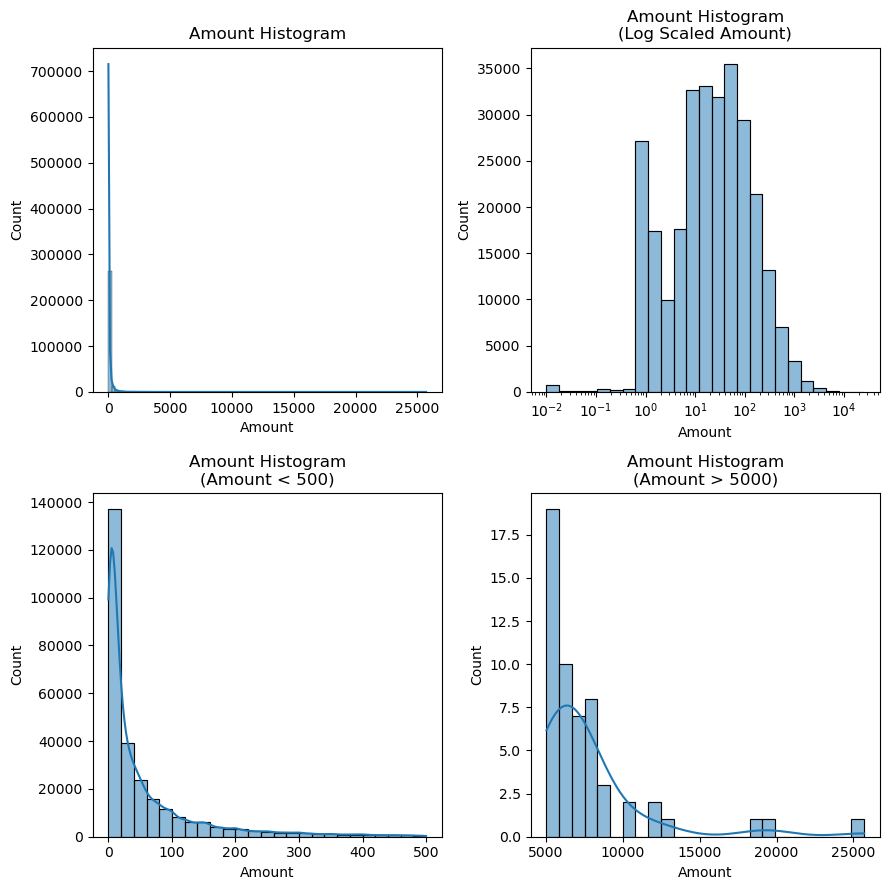

In [11]:
fig, ax = plt.subplots(2,2, figsize=(9,9))
ax[0,0] = sns.histplot(ccdata, x='Amount', bins=100, kde=True, ax=ax[0,0])
ax[0,1] = sns.histplot(ccdata, x='Amount', bins=25, kde=True, log_scale=True, ax=ax[0,1])
ax[1,0] = sns.histplot(ccdata[ccdata['Amount'] < 500], x='Amount', bins=25, kde=True, ax=ax[1,0]) # hue='Class' not useful
ax[1,1] = sns.histplot(ccdata[ccdata['Amount'] > 5000], x='Amount', bins=25, kde=True, ax=ax[1,1]) # hue='Class' not useful

ax[0,0].set_title('Amount Histogram')
ax[0,1].set_title('Amount Histogram\n(Log Scaled Amount)')
ax[1,0].set_title('Amount Histogram\n(Amount < 500)')
ax[1,1].set_title('Amount Histogram\n(Amount > 5000)')

plt.tight_layout();

The histograms show that almost all transactions are of very low amounts. The reduction appears to happen logarithmically.

Very few transactions happen beyond the amount of 5000.

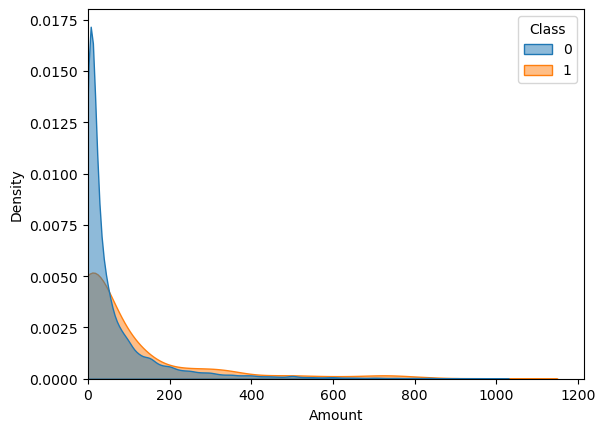

In [12]:
sns.kdeplot(ccdata[ccdata['Amount'] < 1000], x='Amount', hue='Class', fill=True, common_norm=False, alpha=.5)

plt.xlim(left=0);

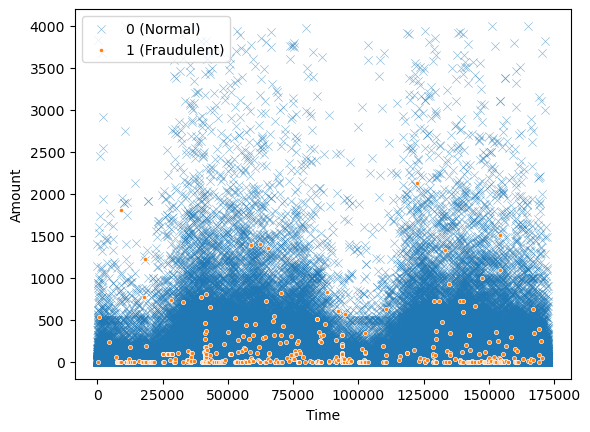

In [46]:
sns.scatterplot(data=ccdata[(ccdata['Amount'] < 4000) & (ccdata['Class'] == 0)], y='Amount', x='Time', alpha=0.5, marker='x', label='0 (Normal)')
sns.scatterplot(data=ccdata[(ccdata['Amount'] < 4000) & (ccdata['Class'] == 1)], y='Amount', x='Time', alpha=1, marker='.', label='1 (Fraudulent)', color='tab:orange')
plt.legend();

We can see in the density plot that most fraudulent (class=1) transactions are of small amounts but occur at a relatively higher rate for transactions larger than approximately 50 than normal transactions (class=0).

The scatter plot shows a different representation of the transaction amount and time.

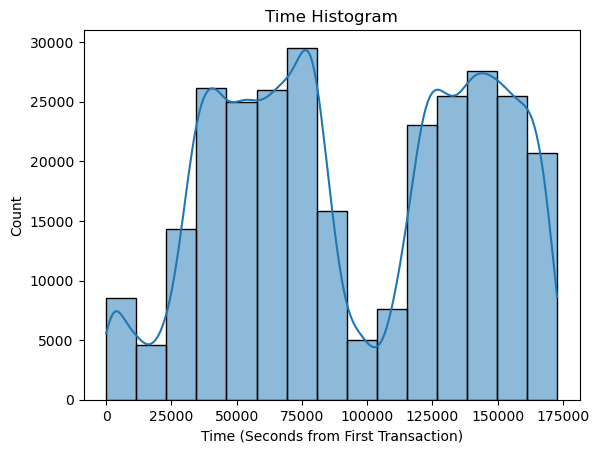

In [13]:
sns.histplot(ccdata, x='Time', bins=15, kde=True)

plt.title('Time Histogram')
plt.xlabel('Time (Seconds from First Transaction)');

One day is equal to 86,400 seconds. We can see that the data is collected over two days.
The majority of transactions happen during the day between 8 am (28,800 and 115,200 seconds) and midnight (86,400 and 172,800 seconds).

### Pricipal Compontent Features (V1-V28)

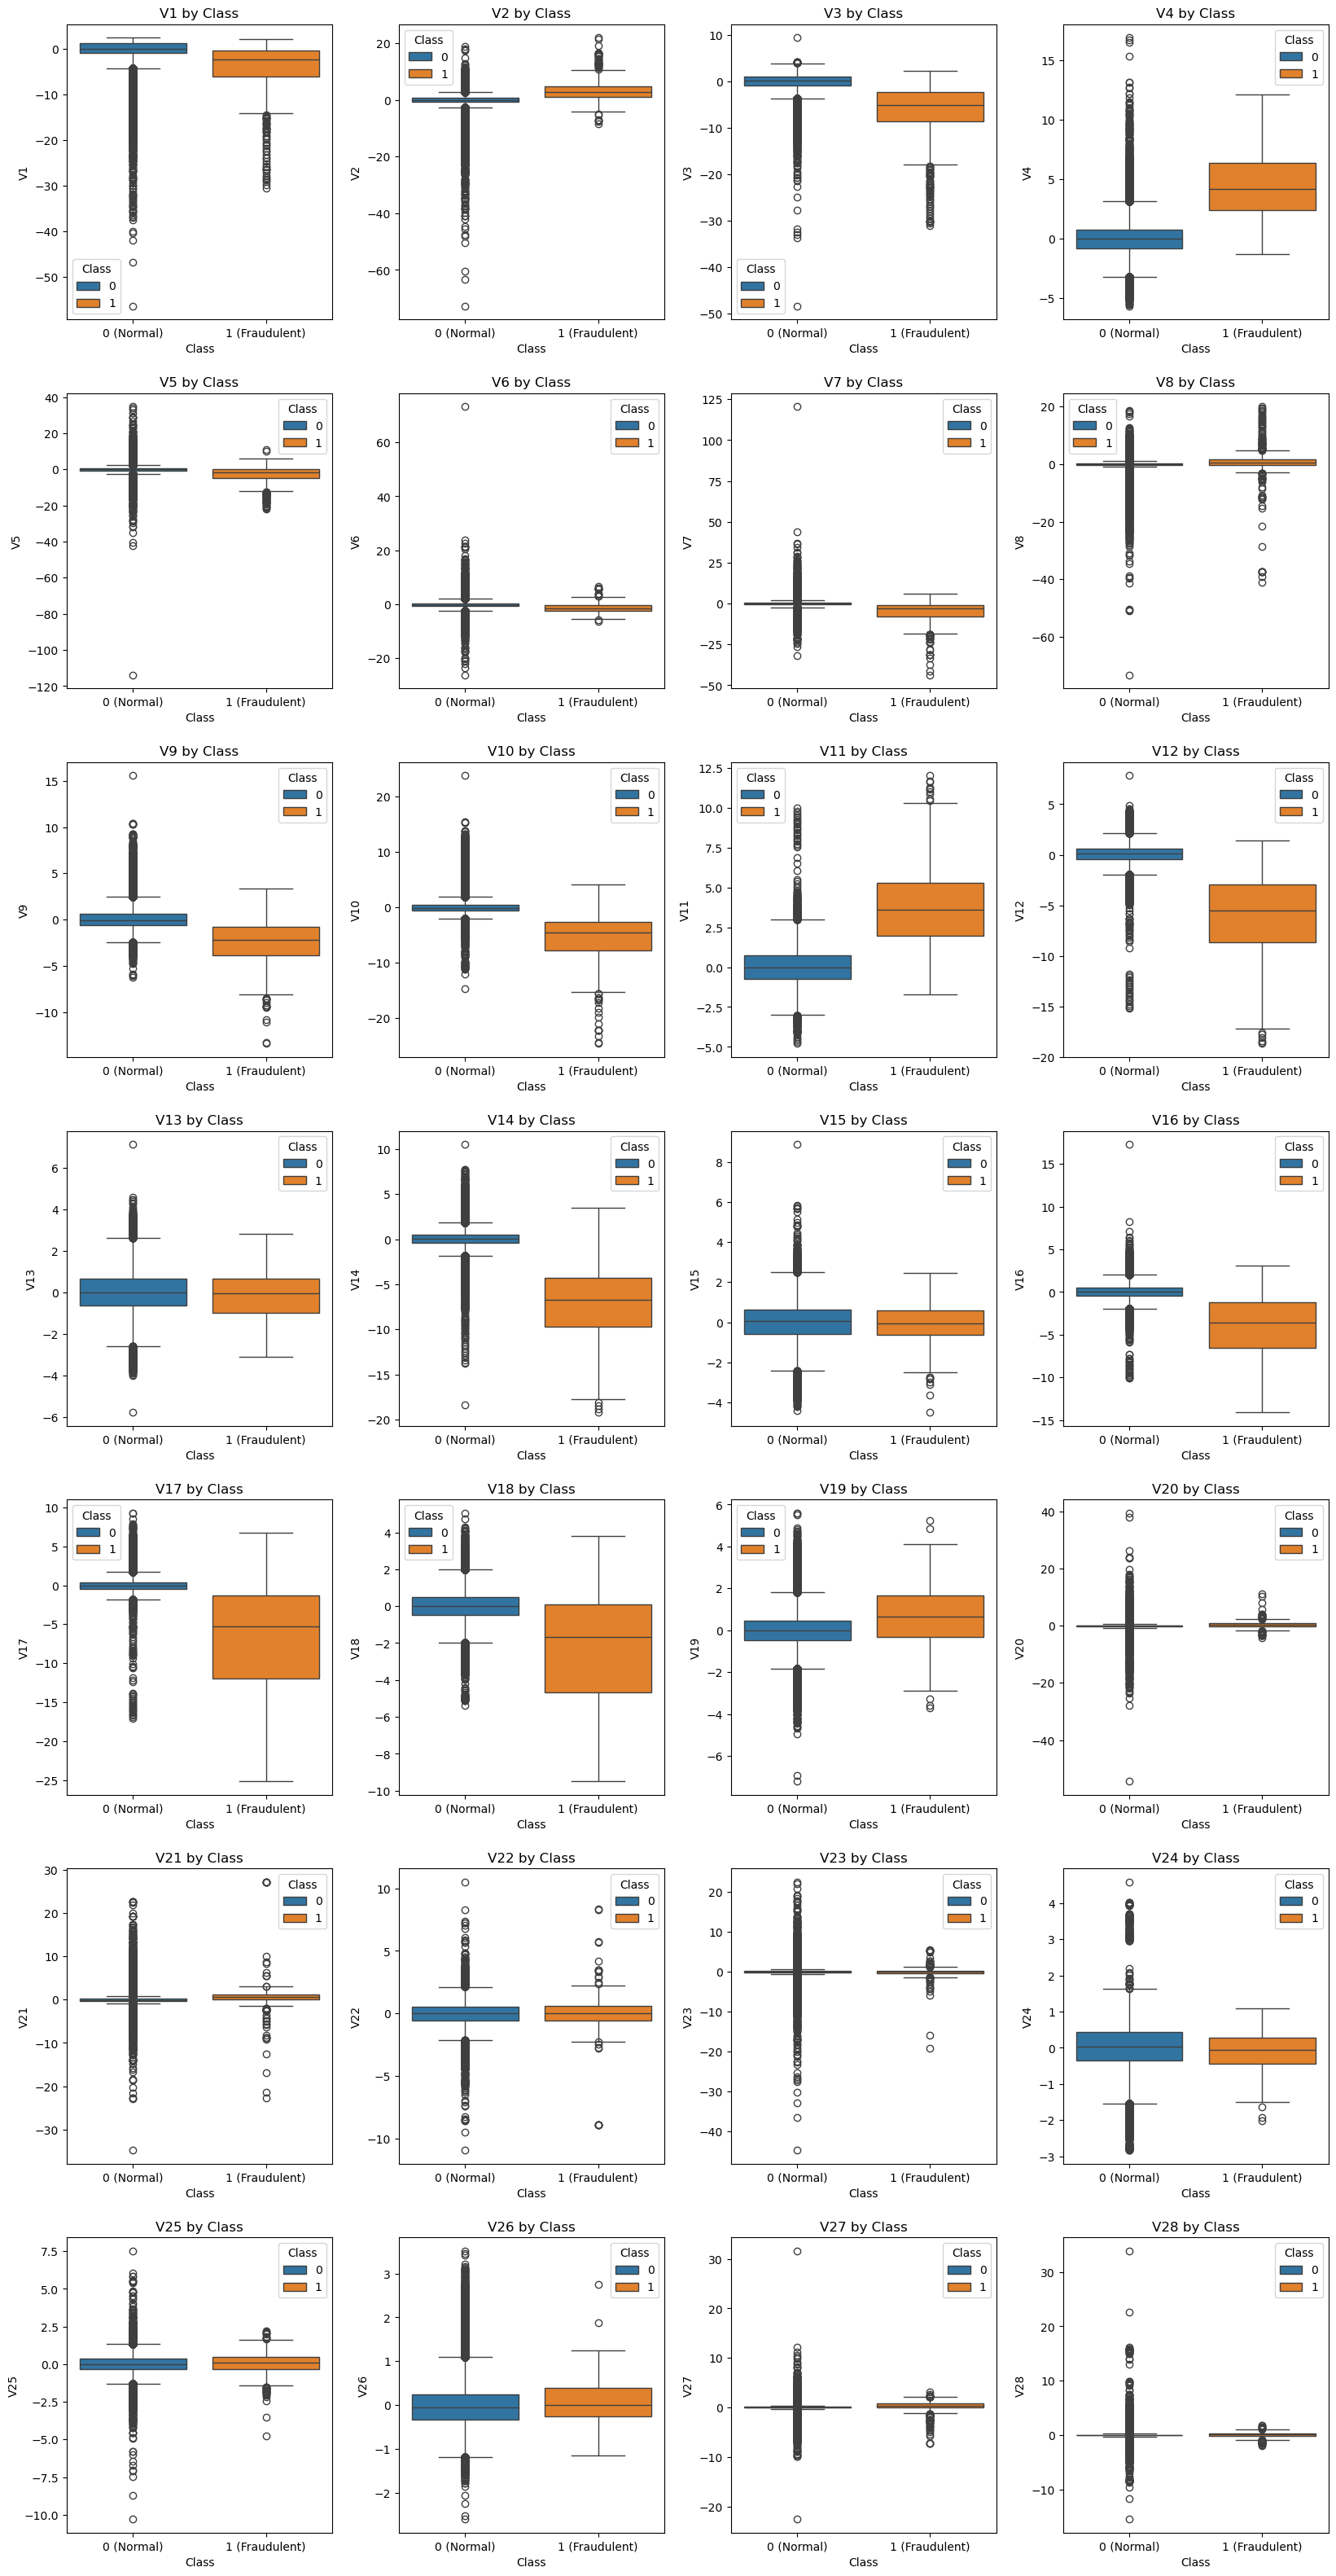

In [14]:
fig, ax = plt.subplots(7,4, figsize=(20,40))

for i, feature in enumerate(ccdata.columns[1:-2]):
    sns.boxplot(x='Class', y=feature
                ,data=ccdata
                ,ax=ax[i//4, i%4] # row: floor div (rounded DOWN to int), column: modulo/remainder
                ,palette=['tab:blue', 'tab:orange']
                ,hue='Class')
    
    ax[i//4, i%4].set_title(f'{feature} by Class')

    ax[i//4, i%4].set_xticks([0, 1]) # to prevent error messages
    ax[i//4, i%4].set_xticklabels(['0 (Normal)', '1 (Fraudulent)'], rotation=0);

plt.subplots_adjust(hspace=0.25, wspace=0.25);

While there are a lot of outliers in the boxplots of the principal components, there appear to be significant differences between normal and fraudulent transactions for most features. A concern is the imbalance of the dataset with a very low number of fraudulent transactions.

### Correlation Between Features

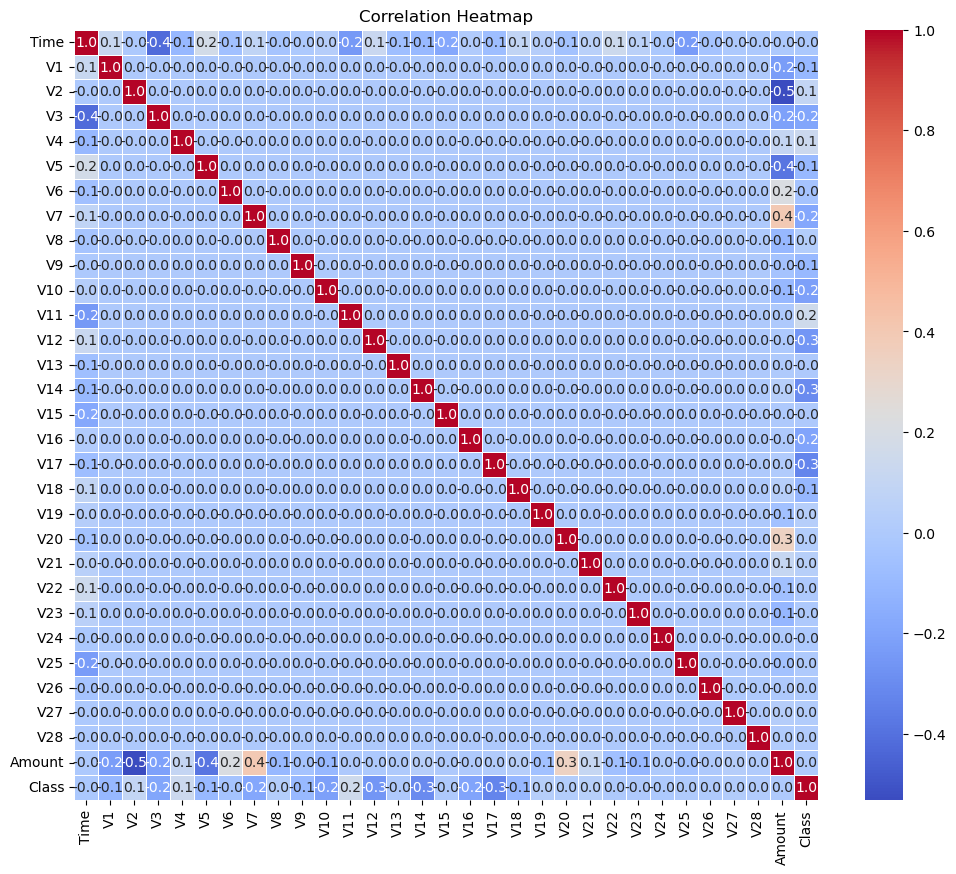

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(ccdata.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)

plt.title('Correlation Heatmap');

The correlation heatmap does not show any strong linear relationships (no linear correlation is expected for PCA features). However, there could be nonlinear relationships or a combination of features that predict other features more accurately.